In [74]:
import os
import csv
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 


In [75]:
# read csv
def make_df(path): 
    df = pd.read_csv(path)
    return df

In [76]:
# analyze the general data
path = Path("/Users/sarahdutton/Desktop/crime_report.csv")
starting_df = pd.read_csv(path)
directory = os.path.dirname(path)
starting_df.head()

/var/folders/05/hqdn865j4plg9vq4vjst54t00000gn/T/ipykernel_10011/250420736.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  starting_df = pd.read_csv(path)


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2006471156,FAMILY DISTURBANCE,3400,N,02/16/2006 02:25:00 PM,02/16/2006,1425.0,02/16/2006 02:25:00 PM,02/16/2006,1425.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20045044338,TAMPERING WITH ID NUMBER,2719,N,09/14/2004 03:32:00 PM,09/14/2004,1532.0,09/14/2004 03:32:00 PM,09/14/2004,1532.0,...,NaN,N,09/14/2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006960811,FAMILY DISTURBANCE,3400,N,04/06/2006 10:29:00 AM,04/06/2006,1029.0,04/06/2006 10:29:00 AM,04/06/2006,1029.0,...,NaN,N,05/01/2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013851154,SEXUAL ASSAULT OF CHILD/OBJECT,1707,Y,01/01/2009 12:01:00 AM,01/01/2009,1.0,03/26/2013 04:56:00 PM,03/26/2013,1656.0,...,4.00,C,04/11/2013,11C,Rape,0.0,0.0,NaN,NaN,NaN
4,20161800084,RAPE OF A CHILD,204,Y,06/28/2016 01:05:00 AM,06/28/2016,105.0,06/28/2016 01:05:00 AM,06/28/2016,105.0,...,24.41,C,07/01/2016,11A,Rape,0.0,0.0,NaN,NaN,NaN


In [77]:
# check columns
print("The names of the columns are :\n", list(starting_df.columns))

The names of the columns are :
 ['Incident Number', 'Highest Offense Description', 'Highest Offense Code', 'Family Violence', 'Occurred Date Time', 'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date', 'Report Time', 'Location Type', 'Address', 'Zip Code', 'Council District', 'APD Sector', 'APD District', 'PRA', 'Census Tract', 'Clearance Status', 'Clearance Date', 'UCR Category', 'Category Description', 'X-coordinate', 'Y-coordinate', 'Latitude', 'Longitude', 'Location']


In [78]:
# reduce the data to the columns of focus
reduced_starting = starting_df.loc[:, ["Incident Number", "Highest Offense Description", "Highest Offense Code", "Family Violence", 'Occurred Date Time',
       'Occurred Date', 'Occurred Time', "Report Date", "Category Description"]]
reduced_starting.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date,Category Description
0,2006471156,FAMILY DISTURBANCE,3400,N,02/16/2006 02:25:00 PM,02/16/2006,1425.0,02/16/2006,NaN
1,20045044338,TAMPERING WITH ID NUMBER,2719,N,09/14/2004 03:32:00 PM,09/14/2004,1532.0,09/14/2004,NaN
2,2006960811,FAMILY DISTURBANCE,3400,N,04/06/2006 10:29:00 AM,04/06/2006,1029.0,04/06/2006,NaN
3,2013851154,SEXUAL ASSAULT OF CHILD/OBJECT,1707,Y,01/01/2009 12:01:00 AM,01/01/2009,1.0,03/26/2013,Rape
4,20161800084,RAPE OF A CHILD,204,Y,06/28/2016 01:05:00 AM,06/28/2016,105.0,06/28/2016,Rape


In [79]:
# Missing Values 
print("Number of Missing Values in the whole dataset : ", reduced_starting.isna().sum().sum())

Number of Missing Values in the whole dataset :  1559923


In [80]:
# Let's count number of null entries per feature
missing_values = list(reduced_starting.isna().sum())
# missing values is a list of the number of missing values in each column

cols = list(reduced_starting.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) # making a dicionary for the missing values

print("Number of Missing Values per feature >>")
missing_vals = pd.DataFrame(d, index=["Missing Values"]) # Making a custom dataframe from dict d
missing_vals.head()

Number of Missing Values per feature >>


,Others,Occurred Date Time,Occurred Time,Category Description
Missing Values,0,137,60,1559726


In [81]:
reduced_starting['Date']=pd.to_datetime(reduced_starting['Occurred Date'])

In [82]:
reduced_starting.index = pd.DatetimeIndex(reduced_starting.Date)
reduced_starting.index = pd.to_datetime(reduced_starting.index)

In [83]:
reduced_starting['Highest Offense Description'] = pd.Categorical(reduced_starting['Highest Offense Description'])
reduced_starting['Highest Offense Description']

Date
2006-02-16                FAMILY DISTURBANCE
2004-09-14          TAMPERING WITH ID NUMBER
2006-04-06                FAMILY DISTURBANCE
2009-01-01    SEXUAL ASSAULT OF CHILD/OBJECT
2016-06-28                   RAPE OF A CHILD
                           ...              
2020-09-24                  DEBIT CARD ABUSE
2010-03-19               BURGLARY OF VEHICLE
2008-12-16                  PROTECTIVE ORDER
2010-06-06       VIOL CITY ORDINANCE - OTHER
2010-08-25               FORGERY AND PASSING
Name: Highest Offense Description, Length: 2474105, dtype: category
Categories (437, object): ['ABANDONED REFRIGERATOR', 'ABUSE OF 911', 'ABUSE OF CORPSE', 'ABUSE OF OFFICIAL CAPACITY', ..., 'VOCO AMPLIFIED MUSIC/VEHICLE', 'VOCO SOLICITATION PROHIBIT', 'WARRANT ARREST NON TRAFFIC', 'WEAPON VIOL - OTHER']

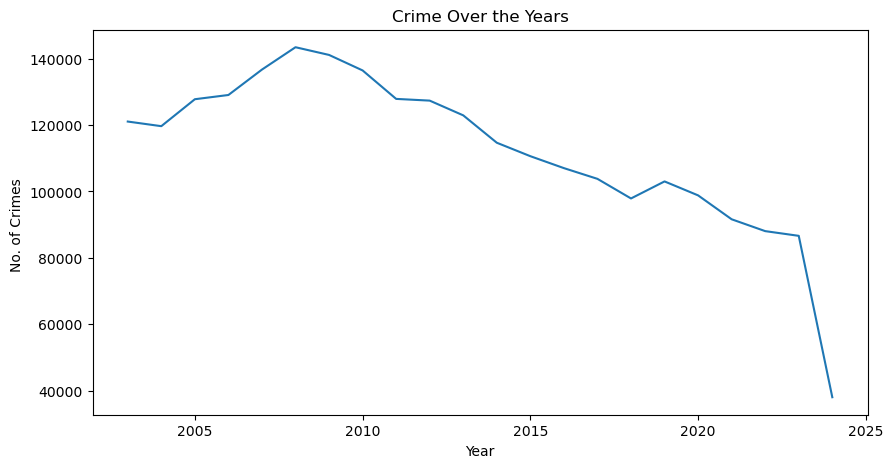

In [84]:
plt.figure(figsize = (10,5))
reduced_starting.groupby([reduced_starting.index.year]).size().plot.line()

plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('No. of Crimes ')
plt.show()

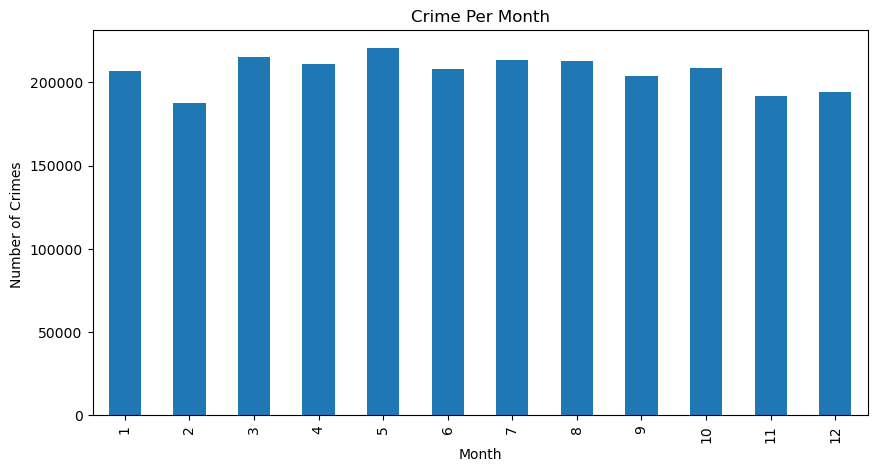

In [85]:
plt.figure(figsize = (10,5))
reduced_starting.groupby([reduced_starting.index.month]).size().plot.bar()
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes ')
plt.show()

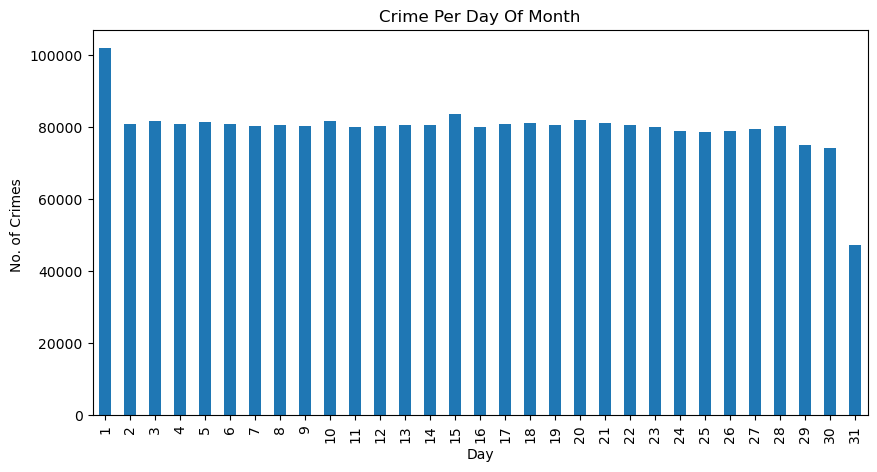

In [86]:
plt.figure(figsize = (10,5))
reduced_starting.groupby([reduced_starting.index.day]).size().plot.bar()
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('No. of Crimes ')
plt.show()

In [87]:
# link columns to create a series
date_crime = pd.concat([starting_df['Occurred Date'], starting_df['Highest Offense Description']], axis=1)

In [88]:
crimes = date_crime['Highest Offense Description'].unique()

In [89]:
# find only theft crimes
filtered_theft_crime = date_crime[date_crime['Highest Offense Description'].str.contains('theft', case=False)]

In [90]:
# find only bulglary crimes
filtered_burgl_crime = date_crime[date_crime['Highest Offense Description'].str.contains('burglary', case=False)]

In [91]:
# link theft and bulglary crimes
all_theft_crimes = pd.concat([filtered_theft_crime, filtered_burgl_crime], ignore_index=True)

In [92]:
# find all theft crimes to prepare to organize by season
all_theft_crimes['Occurred Date'] = pd.to_datetime(all_theft_crimes['Occurred Date'], format='mixed')

In [93]:
# organize theft by season
all_theft_crimes['Season'] = pd.cut(
    all_theft_crimes['Occurred Date'].dt.dayofyear,
    bins= [0, 79, 171, 264, 355, 365],
    labels=['Winter', 'Spring', 'Summer', 'Fall', 'Winter'],
    ordered=False)

In [94]:
# drop the date column
season_theft_crimes = all_theft_crimes.drop(columns=['Occurred Date'])
season_theft_crimes

,Highest Offense Description,Season
0,IDENTITY THEFT,Spring
1,THEFT,Winter
2,IDENTITY THEFT,Summer
3,THEFT FROM PERSON,Fall
4,IDENTITY THEFT,Winter
...,...,...
874295,BURGLARY NON RESIDENCE,Fall
874296,BURGLARY OF VEHICLE,Spring
874297,BURGLARY OF VEHICLE,Summer
874298,BURGLARY NON RESIDENCE,Fall


In [95]:
season_theft_crimes_count = season_theft_crimes.groupby('Highest Offense Description').count()
season_theft_crimes_count.head()

,Season
Highest Offense Description,
ATT AUTO THEFT,307
ATT BURGLARY NON RESIDENCE,156
ATT BURGLARY OF RESIDENCE,457
ATT THEFT,206
AUTO THEFT,62113


In [96]:
value_counts = season_theft_crimes['Highest Offense Description'].value_counts().sort_values(ascending=False).head()

# Print the value counts
print(value_counts)

Highest Offense Description
BURGLARY OF VEHICLE      255338
THEFT                    230215
BURGLARY OF RESIDENCE     82257
AUTO THEFT                62144
THEFT BY SHOPLIFTING      54716
Name: count, dtype: int64


In [97]:
series = pd.Series(value_counts)

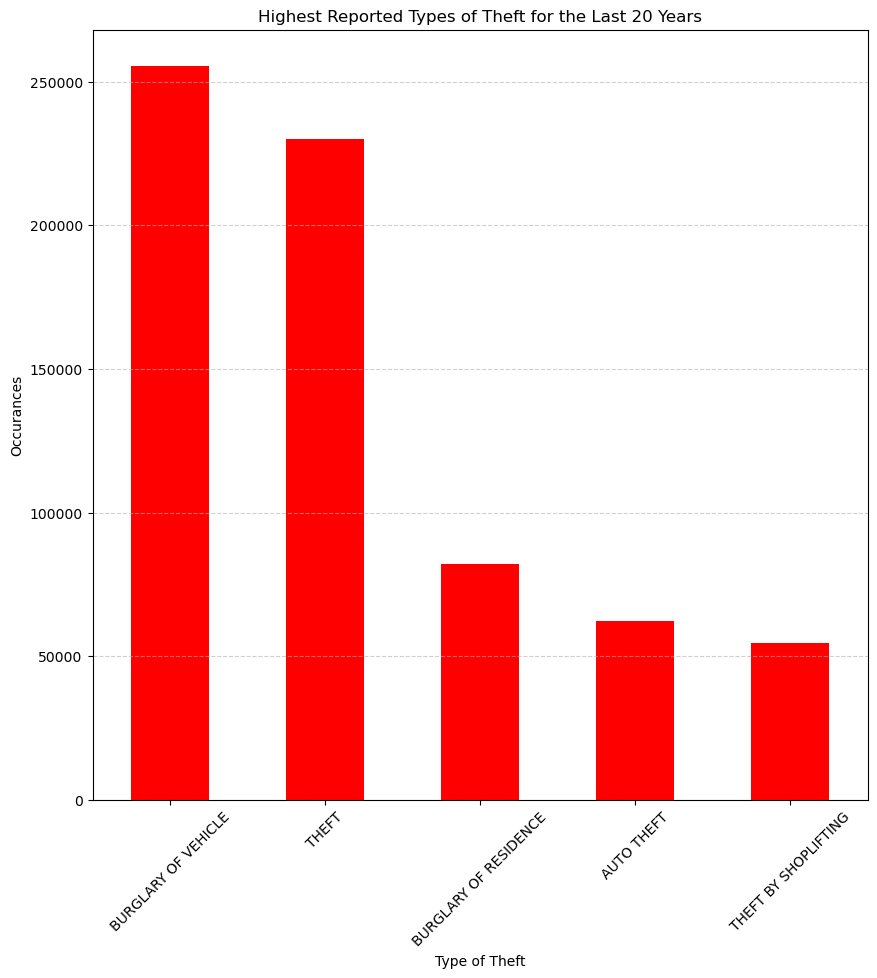

In [98]:
# Transpose (swap rows and columns)
transposed_data = value_counts.transpose()


# Create the bar chart
plt.figure(figsize=(10, 10))  
transposed_data.plot(kind='bar', color='red')  

# Rotate x-axis labels for better readability
plt.xticks(rotation=45) 

# Add labels and title 
plt.xlabel('Type of Theft')  
plt.ylabel('Occurances')
plt.title('Highest Reported Types of Theft for the Last 20 Years')

plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add dashed grid lines on y-axis

# Display the chart
plt.show()

In [99]:
season_theft_crimes_res = season_theft_crimes[season_theft_crimes['Highest Offense Description'] == 'BURGLARY OF RESIDENCE']

In [100]:
season_theft_crimes_res_gb = season_theft_crimes_res.groupby('Season')['Highest Offense Description'].count()
season_theft_crimes_res_gb

/var/folders/05/hqdn865j4plg9vq4vjst54t00000gn/T/ipykernel_10011/2479529178.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_theft_crimes_res_gb = season_theft_crimes_res.groupby('Season')['Highest Offense Description'].count()


Season
Fall      21537
Spring    20992
Summer    20426
Winter    19240
Name: Highest Offense Description, dtype: int64

Text(0, 0.5, 'Occurrances')

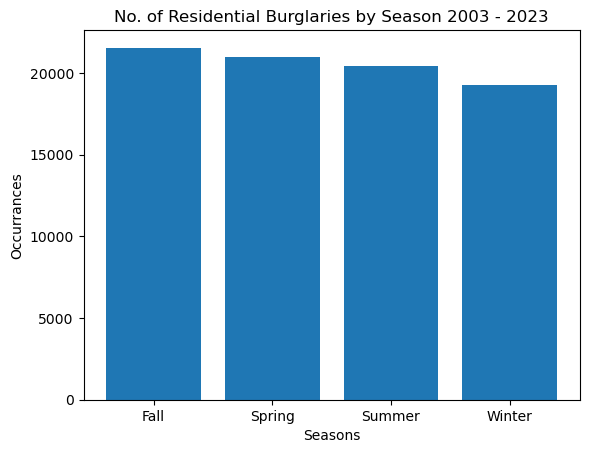

In [101]:
Seasons = ["Fall", "Spring", "Summer", "Winter"]
Occurrances = [21537, 20992, 20426, 19240]
plt.bar(Seasons, Occurrances)

# Set chart title and labels
plt.title('No. of Residential Burglaries by Season 2003 - 2023')
plt.xlabel('Seasons')
plt.ylabel('Occurrances')

In [102]:
season_theft_crimes_shoplift = season_theft_crimes[season_theft_crimes['Highest Offense Description'] == 'THEFT BY SHOPLIFTING']

In [103]:
# theft crime by season COUNT
season_theft_crimes_shoplift_group = season_theft_crimes_shoplift.groupby('Season')['Highest Offense Description'].count()
season_theft_crimes_shoplift_group

/var/folders/05/hqdn865j4plg9vq4vjst54t00000gn/T/ipykernel_10011/3527912714.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_theft_crimes_shoplift_group = season_theft_crimes_shoplift.groupby('Season')['Highest Offense Description'].count()


Season
Fall      13274
Spring    13880
Summer    13793
Winter    13741
Name: Highest Offense Description, dtype: int64

Text(0, 0.5, 'Incidences')

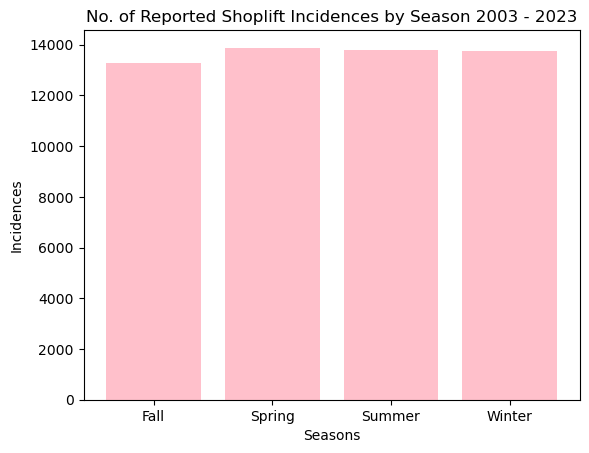

In [104]:
Seasons = ["Fall", "Spring", "Summer", "Winter"]
Occurrances = [13274, 13880, 13793, 13741]
Colors = ['pink']
plt.bar(Seasons, Occurrances, color=Colors)

# Set chart title and labels
plt.title('No. of Reported Shoplift Incidences by Season 2003 - 2023')
plt.xlabel('Seasons')
plt.ylabel('Incidences')

In [105]:
season_theft_crimes_BICYCLE = season_theft_crimes[season_theft_crimes['Highest Offense Description'] == 'THEFT OF BICYCLE']


In [106]:
# bicicle theft incidences by season
season_theft_crimes_BICYCLE_group = season_theft_crimes_BICYCLE.groupby('Season')['Highest Offense Description'].count()
season_theft_crimes_BICYCLE_group

/var/folders/05/hqdn865j4plg9vq4vjst54t00000gn/T/ipykernel_10011/1945068460.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_theft_crimes_BICYCLE_group = season_theft_crimes_BICYCLE.groupby('Season')['Highest Offense Description'].count()


Season
Fall      6285
Spring    6173
Summer    6789
Winter    5074
Name: Highest Offense Description, dtype: int64

Text(0, 0.5, 'Incidences')

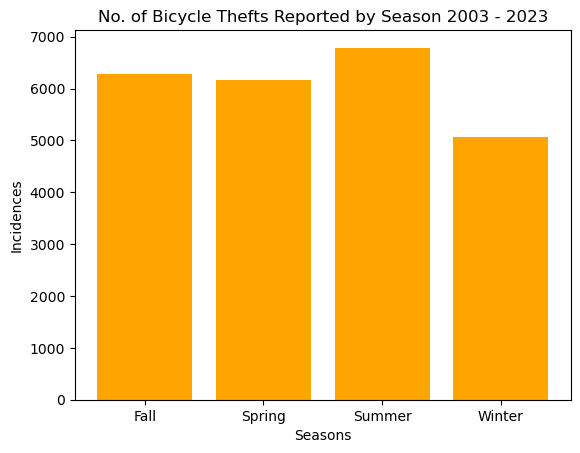

In [107]:
Seasons = ["Fall", "Spring", "Summer", "Winter"]
Occurrances = [6285, 6173, 6789, 5074]
Colors = ['orange']
plt.bar(Seasons, Occurrances, color=Colors)

# Set chart title and labels
plt.title('No. of Bicycle Thefts Reported by Season 2003 - 2023')
plt.xlabel('Seasons')
plt.ylabel('Incidences')

In [108]:
# Calculate critical value 
critical_value = stats.chi2.ppf(q = 0.95, df = 3)
critical_value

7.814727903251179

In [109]:
# Observed frequencies of residential burglaries in each season
data = np.array([21537, 20813, 20426, 19239])  # Fall, Spring, Summer, Winter

# As we're dealing with one categorical group only, we need to generate expected frequencies assuming no effect of seasons
total = data.sum()
expected = np.full(shape=data.shape, fill_value=total / 4)

# Performing the Chi-square test
chi2, p_value = stats.chi2_contingency([data, expected])[:2]

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value}")

Chi-Square Statistic: 68.10559048133163
p-value: 1.0860061995797653e-14


In [110]:
# all crimes by season COUNT
season_theft_crimes = season_theft_crimes.groupby('Season')['Highest Offense Description'].count()
season_theft_crimes

/var/folders/05/hqdn865j4plg9vq4vjst54t00000gn/T/ipykernel_10011/1790618881.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_theft_crimes = season_theft_crimes.groupby('Season')['Highest Offense Description'].count()


Season
Fall      218189
Spring    223954
Summer    222042
Winter    209607
Name: Highest Offense Description, dtype: int64

In [112]:
#CHI SQUARE TEST FOR ALL CRIMES BY SEASON



# Your data from the identity theft by season chart
data = np.array([218189, 223954, 222042, 209607])  # Fall, Spring, Summer, Winter

# As we're dealing with one categorical group only, we need to generate expected frequencies assuming no effect of seasons
total = data.sum()
expected = np.full(shape=data.shape, fill_value=total / 4)

# Chi-square test
chi2, p_value = stats.chi2_contingency([data, expected])[:2]

print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value}")


Chi-Square Statistic: 280.6044358946858
p-value: 1.566923504984882e-60
